In [1]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns

In [72]:
class KNN_classifier:
    def __init__(self, k):
        self.k=k
       

    def fit(self,X_train,Y_train):
        self.X_train=X_train
        self.Y_train=Y_train
    
    def predict(self,X_test):
        m = self.X_train.shape[0]
        n = X_test.shape[0]
        y_pred = []
        
        # Calculating distances using Euclidean formula
        for i in range(n):  # for every sample in X_test
            distance = []  # To store the distances
            for j in range(m):  # for every sample in X_train
                    d = (np.sqrt(np.sum(np.square(X_test[i,:] - self.X_train[j,:]))))  # Euclidean distance
                    distance.append((d, Y_train[j]))    
            distance = sorted(distance) # sorting distances in ascending order
            
        # Getting k nearest neighbors
            neighbors = []
            for item in range(self.k):
                neighbors.append(distance[item][1])  # appending K nearest neighbors

            # Making predictions
            y_pred.append(stats.mode(neighbors)[0][0])  # For Classification
        return y_pred
      
    # determine accuracy
    def accuracy_score(self,actual_value,predicted_value):
        accuracy=0
        for i in range(len(predicted_value)):
            if predicted_value[i]==actual_value.iloc[i]:
                accuracy=accuracy+1
        test_accuracy=accuracy/len(predicted_value)
        return test_accuracy
    
    #calculating precision, recall, f1
    def confusion_matrix(self,actual_value,predicted_value):
        tp=0
        tn=0
        fp=0
        fn=0
        for i in range(len(predicted_value)):
            if predicted_value[i]==0:
                if predicted_value[i]==actual_value.iloc[i]:
                    tn=tn+1
                else:
                    fn=fn+1
            if predicted_value[i]==1:
                if predicted_value[i]==actual_value.iloc[i]:
                    tp=tp+1
                else:
                    fp=fp+1
        prec=tp/(tp+fp)
        recall=tp/(tp+fn)
        f1=2*(prec*recall)/(prec+recall)
        return prec,recall,f1

In [73]:
#reading the data
data=pd.read_csv('heart.csv',header=0)
data=data.dropna()

In [74]:
print(data.shape) # size of the data
data.head() #display excel sheet

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [75]:
# checking whether the data is balanced

print('Amount of patients without a heart disease:', (data['HeartDisease']==0).sum())
print('Amount of patients with a heart disease:', (data['HeartDisease']==1).sum())

#data is almost balanced.

Amount of patients without a heart disease: 410
Amount of patients with a heart disease: 508


In [78]:
# Separating features from the target we want to predict
X = data.drop('HeartDisease', axis=1)
Y = data['HeartDisease']

In [79]:
# creating dummy variables for the categorical features
X = pd.get_dummies(X, drop_first=True)

In [80]:
#standardization/Normalising  data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

X = standardized_data
Y = data['HeartDisease']

In [81]:
#splitting data to train(80% (train=60%, validate=20%)) and test 20%
X1, X_test, Y1, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle= False) 
X_train, X_val, Y_train, Y_val = train_test_split(X1, Y1, test_size=0.25, random_state=42, shuffle= False) 
#X1=initial training, X2=final testing

In [86]:
# model fitting using training and validation data
n_neighbors = 100
accuracy_k = []

for n_neighbors in range(1,n_neighbors+1):

    model = KNN_classifier(k=n_neighbors)
    model.fit(X_train, Y_train)
    # modelevaluation 
    predictions = model.predict(X_val)
    accuracy_pred = model.accuracy_score(Y_val, predictions)

    accuracy_k.append(accuracy_pred)

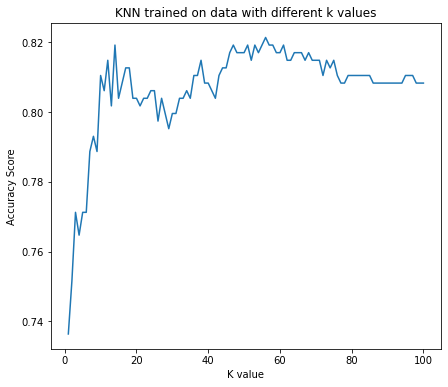

In [87]:
plt.figure(figsize=(7,6))
plt.title('KNN trained on data with different k values')
plt.ylabel('Accuracy Score')
plt.xlabel('K value')
sns.lineplot(x=range(1, n_neighbors+1), y=accuracy_k[:100]);

In [98]:
print('max accuracy obtained:', round(max(accuracy_k[:100]), 3))
mval=(max(accuracy_k[:100]))
k1=(accuracy_k.index(mval))+1


max accuracy obtained: 0.821


In [102]:
#evaluating test_dataset for best value of k
model = KNN_classifier(k=k1)
model.fit(X_train, Y_train)
b_y_pred = model.predict(X_test)
accuracy_pred = model.accuracy_score(Y_test, b_y_pred)
print('accuracy:', accuracy_pred)

accuracy: 0.868421052631579


In [103]:
#calculating precision,recall,f1_score
precision,recall,f1_score = model.confusion_matrix(Y_test,b_y_pred)
print(precision,recall,f1_score)

0.9484536082474226 0.9019607843137255 0.9246231155778893
